# Clustering Analysis

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale,normalize, StandardScaler
from sklearn import datasets

from sklearn.metrics import confusion_matrix, classification_report , accuracy_score

In [83]:
# standard data set , no need to save csv locally , many standard dataset just write load_WriteDatasetName(),it will ok fine
iris = datasets.load_iris() 


In [84]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [85]:
#iris ==> DESCR , data, target, feature_names
iris.data.shape

(150, 4)

In [88]:
#iris.fromkeys

In [89]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [90]:
#X = scale(iris.data)
X=iris.data
# y = pd.DataFrame(iris.target) # no need


In [91]:
X = scale(X)

In [92]:
#y

In [93]:
# X = scale(X) # use , when i want to increase accuracy

In [94]:
clustering = KMeans(n_clusters=3)
# i know k_value = 3(means , 3 flowers (versi , setosa , virginica))
# it is easy for clustering , otherwise it will be very diffcult
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [95]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [96]:
#target_predicted = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
target_predicted = np.choose(clustering.labels_,[0,1,2]).astype(np.int64)

# [0,1,2] : no of flower


In [97]:
target_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [98]:
accuray = accuracy_score(iris.target , target_predicted)
accuray


0.22

In [99]:
# i am using confusion_matrix , bcoz i know k_value
# i do not know k_value , i can not use confusion_matrix
# if k_value is known , then clustering function is same as classification function(like confusion_matrix)
confusion_matrix(iris.target , target_predicted) 

# confusion_matrix output is :
# array([[50,  0,  0],
#        [ 0, 48,  2],
#        [ 0, 14, 36]])

# 50 : first_flowers(might be virginia) , it is good
# 48 : second_flowers(might be versi) , it is not good , bcoz 2 is missing
# 36 : second_flowers(might be sentosa) , it is not good , bcoz 14 is missing    

array([[ 0, 50,  0],
       [39,  0, 11],
       [17,  0, 33]])

# plotting your model outputs

In [117]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
y.columns =['Targets']

AttributeError: 'list' object has no attribute 'columns'

In [101]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [102]:
#color_theme[2]

In [116]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

Text(0.5,1,'This is Actual Flower Cluster')

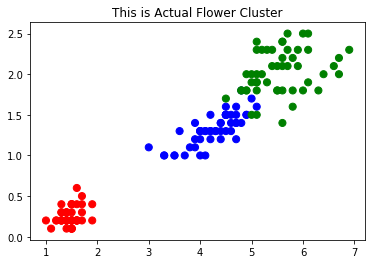

In [103]:
# petal target graph
color_theme = np.array(['red','blue','green'])

plt.scatter(x=iris_df.petal_length, y=iris_df.petal_width, c= color_theme[iris.target],s=50)
plt.title ("This is Actual Flower Cluster")


Text(0.5,1,'This is KMeans Clustering ')

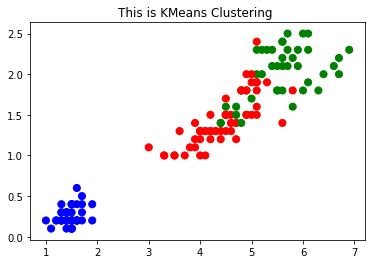

In [104]:
# petal target_predicted graph
plt.scatter(x=iris_df.petal_length, y=iris_df.petal_width, c= color_theme[target_predicted],s=50)
plt.title ("This is KMeans Clustering ")

Text(0.5,1,'This is Actual Flower Cluster')

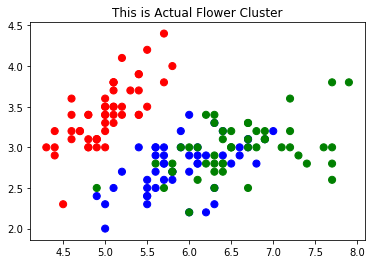

In [105]:
# sepal target graph
color_theme = np.array(['red','blue','green'])

plt.scatter(x=iris_df.sepal_length, y=iris_df.sepal_width, c= color_theme[iris.target],s=50)
plt.title ("This is Actual Flower Cluster")

Text(0.5,1,'This is KMeans Clustering ')

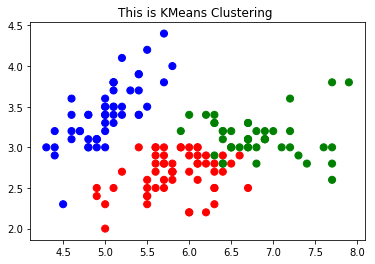

In [106]:
# sepal target_predicted graph
plt.scatter(x=iris_df.sepal_length, y=iris_df.sepal_width, c= color_theme[target_predicted],s=50)
plt.title ("This is KMeans Clustering ")

In [107]:
datasets.load_iris().target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [108]:
clustering.cluster_centers_

array([[-0.01139555, -0.87288504,  0.37688422,  0.31165355],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 1.16743407,  0.15377779,  1.00314548,  1.02963256]])

In [109]:
clustering.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [76]:
#target_predicted is a clustered_label(do nt confuse)
target_predicted = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
target_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [77]:
confusion_matrix(iris.target,target_predicted)

array([[ 0,  0, 50],
       [48,  2,  0],
       [14, 36,  0]])

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target,target_predicted)

0.013333333333333334

In [79]:
import numpy as np
x = [2,3,4,5,6]
y = [8,5,6,3,4]
even = [0,1,0,1,0]
col = np.array(['red','green'])

In [80]:
col[1]

'green'

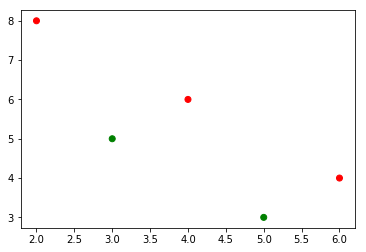

In [81]:

plt.scatter(x,y, c=col[even])